In [ ]:
!pip install numpy==1.21

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install mahotas==1.2.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#-----------------------------------
# GLOBAL FEATURE EXTRACTION
#-----------------------------------
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import cv2
import mahotas
import os
import h5py

# tunable-parameters

images_per_class       = 150
fixed_size             = tuple((500, 500))
train_path             = "/content/drive/MyDrive/Paddy leaf dataset /predefence/train"
h5_train_data          = '/content/drive/MyDrive/Paddy leaf dataset /output/train_data.h5'
h5_train_labels        = '/content/drive/MyDrive/Paddy leaf dataset /output/train_labels.h5'
bins                   = 8

In [ ]:
# Converting each image to RGB from BGR format

def rgb_bgr(image):
    rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return rgb_img

In [ ]:
def bgr_hsv(rgb_img):
    hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)
    return hsv_img

In [ ]:
# image segmentation

# for extraction of green and brown color


def img_segmentation(rgb_img,hsv_img):
    lower_green = np.array([25,0,20])
    upper_green = np.array([100,255,255])
    healthy_mask = cv2.inRange(hsv_img, lower_green, upper_green)
    result = cv2.bitwise_and(rgb_img,rgb_img, mask=healthy_mask)
    lower_brown = np.array([10,0,10])
    upper_brown = np.array([30,255,255])
    disease_mask = cv2.inRange(hsv_img, lower_brown, upper_brown)
    disease_result = cv2.bitwise_and(rgb_img, rgb_img, mask=disease_mask)
    final_mask = healthy_mask + disease_mask
    final_result = cv2.bitwise_and(rgb_img, rgb_img, mask=final_mask)
    return final_result

In [ ]:
# feature-descriptor-1: Hu Moments
def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

In [ ]:
# feature-descriptor-2: Haralick Texture
def fd_haralick(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    return haralick

In [ ]:
# feature-descriptor-3: Color Histogram
def fd_histogram(image, mask=None):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist  = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

In [ ]:
# get the training labels
train_labels = os.listdir(train_path)

# sort the training labels
train_labels.sort()
print(train_labels)

# empty lists to hold feature vectors and labels
global_features = []
labels          = []

['Blast', 'Blight', 'Brown Spot', 'Healthy Leaf']


In [ ]:
# loop over the training data sub-folders
for training_name in train_labels:
    # join the training data path and each species training folder
    dir = os.path.join(train_path, training_name)

    # get the current training label
    current_label = training_name

    # loop over the images in each sub-folder
    for x in range(1,images_per_class+1):
        # get the image file name
        file = dir + "/" + str(x) + ".jpg"

        # read the image and resize it to a fixed-size
        image = cv2.imread(file)
        image = cv2.resize(image, fixed_size)

        
        # Running Function Bit By Bit
        
        RGB_BGR       = rgb_bgr(image)
        BGR_HSV       = bgr_hsv(RGB_BGR)
        IMG_SEGMENT   = img_segmentation(RGB_BGR,BGR_HSV)

        # Call for Global Fetaure Descriptors
        
        fv_hu_moments = fd_hu_moments(IMG_SEGMENT)
        fv_haralick   = fd_haralick(IMG_SEGMENT)
        fv_histogram  = fd_histogram(IMG_SEGMENT)
        
        # Concatenate 
        
        global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])
        
        

        # update the list of labels and feature vectors
        labels.append(current_label)
        global_features.append(global_feature)

    print("[STATUS] processed folder: {}".format(current_label))

print("[STATUS] completed Global Feature Extraction...")

[STATUS] processed folder: Blast
[STATUS] processed folder: Blight
[STATUS] processed folder: Brown Spot
[STATUS] processed folder: Healthy Leaf
[STATUS] completed Global Feature Extraction...


In [ ]:
# get the overall feature vector size
print("[STATUS] feature vector size {}".format(np.array(global_features).shape))

[STATUS] feature vector size (600, 532)


In [ ]:
# get the overall training label size
print("[STATUS] training Labels {}".format(np.array(labels).shape))

[STATUS] training Labels (600,)


In [ ]:
# encode the target labels
targetNames = np.unique(labels)
le          = LabelEncoder()
target      = le.fit_transform(labels)
print("[STATUS] training labels encoded...")

[STATUS] training labels encoded...


In [ ]:
# scale features in the range (0-1)
from sklearn.preprocessing import MinMaxScaler
scaler            = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(global_features)
print("[STATUS] feature vector normalized...")

[STATUS] feature vector normalized...


In [ ]:
print("[STATUS] target labels: {}".format(target))
print("[STATUS] target labels shape: {}".format(target.shape))

[STATUS] target labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 

In [ ]:
# save the feature vector using HDF5
h5f_data = h5py.File(h5_train_data, 'w')
h5f_data.create_dataset('dataset_1', data=np.array(rescaled_features))

<HDF5 dataset "dataset_1": shape (600, 532), type "<f8">

In [ ]:
h5f_label = h5py.File(h5_train_labels, 'w')
h5f_label.create_dataset('dataset_1', data=np.array(target))

<HDF5 dataset "dataset_1": shape (600,), type "<i8">

In [ ]:
h5f_data.close()
h5f_label.close()

In [ ]:
# training
#-----------------------------------
# TRAINING OUR MODEL
#-----------------------------------
import glob
import joblib
import warnings
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


warnings.filterwarnings('ignore')


# tunable-parameters

num_trees = 100
test_size = 0.20
seed      = 9
train_path = "/content/drive/MyDrive/Paddy leaf dataset /predefence/train"
test_path  = "/content/drive/MyDrive/Paddy leaf dataset /predefence/test"
h5_train_data          = '/content/drive/MyDrive/Paddy leaf dataset /output/train_data.h5'
h5_train_labels        = '/content/drive/MyDrive/Paddy leaf dataset /output/train_labels.h5'
scoring    = "accuracy"

# get the training labels
train_labels = os.listdir(train_path)

# sort the training labels
train_labels.sort()

if not os.path.exists(test_path):
    os.makedirs(test_path)

# create all the machine learning models
models = []
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('CART', DecisionTreeClassifier(random_state=seed)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, random_state=seed)))
models.append(('SVM', SVC(random_state=seed)))

# variables to hold the results and names
results = []
names   = []

# import the feature vector and trained labels
h5f_data  = h5py.File(h5_train_data, 'r')
h5f_label = h5py.File(h5_train_labels, 'r')

global_features_string = h5f_data['dataset_1']
global_labels_string   = h5f_label['dataset_1']

global_features = np.array(global_features_string)
global_labels   = np.array(global_labels_string)

h5f_data.close()
h5f_label.close()

# verify the shape of the feature vector and labels
print("[STATUS] features shape: {}".format(global_features.shape))
print("[STATUS] labels shape: {}".format(global_labels.shape))

print("[STATUS] training started...")

[STATUS] features shape: (600, 532)
[STATUS] labels shape: (600,)
[STATUS] training started...


In [ ]:
# split the training and testing data
(trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal) = train_test_split(np.array(global_features),
                                                                                          np.array(global_labels),
                                                                                          test_size=test_size,
                                                                                          random_state=seed
                                                                                          )

print("[STATUS] splitted train and test data...")
print("Train data  : {}".format(trainDataGlobal.shape))
print("Test data   : {}".format(testDataGlobal.shape)) 
print("Train labels: {}".format(trainLabelsGlobal.shape))
print("Test labels : {}".format(testLabelsGlobal.shape))

[STATUS] splitted train and test data...
Train data  : (480, 532)
Test data   : (120, 532)
Train labels: (480,)
Test labels : (120,)


In [ ]:
trainDataGlobal


array([[0.08642206, 0.        , 0.        , ..., 0.00714055, 0.09421951,
        0.9739745 ],
       [0.03390299, 0.03682551, 0.13389671, ..., 0.00714055, 0.09421946,
        0.9739745 ],
       [0.97549961, 0.        , 0.        , ..., 0.00714128, 0.09425458,
        0.97394872],
       ...,
       [0.98997864, 0.        , 0.        , ..., 0.00714392, 0.09449807,
        0.97396079],
       [0.0025112 , 0.        , 0.        , ..., 0.00714055, 0.09421949,
        0.9739745 ],
       [0.05111292, 0.        , 0.        , ..., 0.00714055, 0.09422013,
        0.97397451]])

LR: 0.800000 (0.038640)
CART: 0.837500 (0.058778)
RF: 0.902083 (0.029536)
SVM: 0.795833 (0.040397)


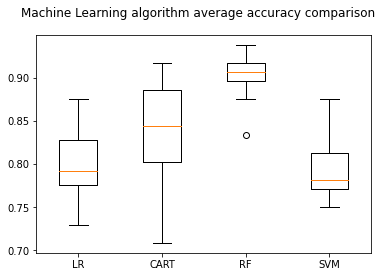

In [ ]:
# 10-fold cross validation
for name, model in models:
    kfold = KFold(n_splits=10,shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, trainDataGlobal, trainLabelsGlobal, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning algorithm average accuracy comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
clf  = RandomForestClassifier(n_estimators=100, random_state=None)
clf.fit(trainDataGlobal, trainLabelsGlobal)

RandomForestClassifier()

In [ ]:
y_predict=clf.predict(testDataGlobal)
y_predict

array([3, 1, 0, 0, 3, 3, 3, 0, 0, 2, 1, 2, 0, 3, 3, 2, 1, 0, 3, 1, 0, 2,
       3, 0, 1, 2, 3, 0, 3, 3, 1, 0, 0, 1, 1, 1, 1, 2, 0, 1, 2, 3, 0, 0,
       3, 0, 2, 2, 0, 2, 0, 3, 2, 1, 3, 3, 3, 1, 3, 3, 1, 1, 0, 0, 0, 3,
       0, 3, 0, 0, 2, 1, 0, 2, 2, 2, 0, 1, 1, 3, 3, 0, 3, 3, 0, 0, 3, 2,
       3, 3, 2, 0, 0, 0, 0, 1, 3, 2, 1, 0, 0, 2, 3, 0, 3, 0, 3, 0, 1, 2,
       0, 0, 1, 2, 1, 1, 2, 1, 1, 2])

In [ ]:
cm = confusion_matrix(testLabelsGlobal,y_predict)
confusion_matrix(testLabelsGlobal,y_predict)#test label er jonne aita

array([[36,  0,  1,  2],
       [ 1, 26,  0,  0],
       [ 2,  0, 22,  1],
       [ 0,  0,  0, 29]])

In [ ]:
print(classification_report(testLabelsGlobal,y_predict))


              precision    recall  f1-score   support

           0       0.92      0.92      0.92        39
           1       1.00      0.96      0.98        27
           2       0.96      0.88      0.92        25
           3       0.91      1.00      0.95        29

    accuracy                           0.94       120
   macro avg       0.95      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(testLabelsGlobal, y_predict)

0.9416666666666667

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

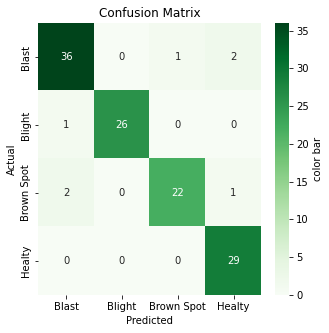

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.heatmap(data=cm ,annot=True, cmap="Greens",cbar_kws={"orientation":"vertical","label":"color bar"},xticklabels=['Blast','Blight','Brown Spot','Healty'],yticklabels=['Blast','Blight','Brown Spot','Healty'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

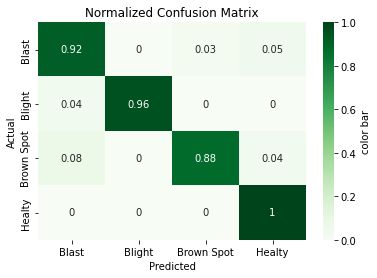

In [ ]:
# --- ---- normalized
import numpy as np
cm_normalized=np.round(cm/np.sum(cm,axis=1).reshape(-1,1),2)
# --- ---- ---- heatmap
sns.heatmap(data=cm_normalized ,annot=True, cmap="Greens",cbar_kws={"orientation":"vertical","label":"color bar"},xticklabels=['Blast','Blight','Brown Spot','Healty'],yticklabels=['Blast','Blight','Brown Spot','Healty'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Normalized Confusion Matrix")
plt.show()

In [ ]:
clf2  =  DecisionTreeClassifier(random_state=False)
clf2.fit(trainDataGlobal, trainLabelsGlobal)

DecisionTreeClassifier(random_state=False)

In [ ]:
y_predict2=clf2.predict(testDataGlobal)
y_predict2

array([3, 1, 0, 2, 3, 3, 3, 0, 3, 2, 1, 2, 0, 0, 3, 2, 1, 0, 3, 1, 0, 2,
       3, 0, 1, 2, 3, 2, 3, 3, 1, 0, 0, 1, 1, 1, 1, 2, 0, 1, 2, 3, 0, 2,
       3, 2, 2, 0, 2, 2, 3, 3, 2, 1, 3, 3, 3, 1, 0, 3, 1, 1, 0, 0, 0, 3,
       3, 3, 0, 0, 2, 1, 0, 2, 2, 2, 3, 1, 1, 3, 3, 0, 0, 3, 0, 0, 3, 2,
       3, 3, 2, 0, 0, 0, 0, 1, 3, 2, 1, 0, 1, 2, 3, 2, 3, 2, 2, 0, 1, 2,
       0, 0, 1, 2, 1, 1, 2, 1, 1, 2])

In [ ]:
cm2 = confusion_matrix(testLabelsGlobal,y_predict2)
confusion_matrix(testLabelsGlobal,y_predict2)#test label er jonne aita

array([[27,  1,  5,  6],
       [ 1, 26,  0,  0],
       [ 1,  0, 24,  0],
       [ 2,  0,  1, 26]])

In [ ]:
print(classification_report(testLabelsGlobal,y_predict2))

              precision    recall  f1-score   support

           0       0.87      0.69      0.77        39
           1       0.96      0.96      0.96        27
           2       0.80      0.96      0.87        25
           3       0.81      0.90      0.85        29

    accuracy                           0.86       120
   macro avg       0.86      0.88      0.86       120
weighted avg       0.86      0.86      0.86       120



In [ ]:
accuracy_score(testLabelsGlobal, y_predict2)

0.8583333333333333

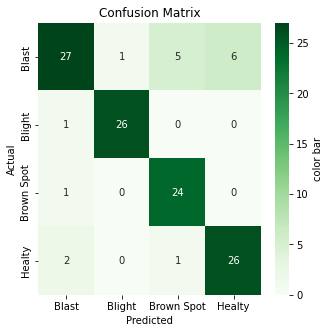

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.heatmap(data=cm2 ,annot=True, cmap="Greens",cbar_kws={"orientation":"vertical","label":"color bar"},xticklabels=['Blast','Blight','Brown Spot','Healty'],yticklabels=['Blast','Blight','Brown Spot','Healty'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

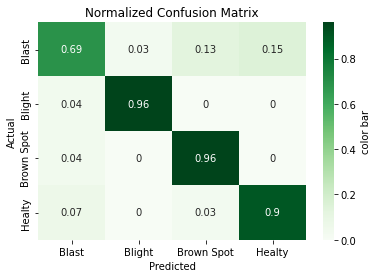

In [ ]:
# --- ---- normalized
import numpy as np
cm2_normalized=np.round(cm2/np.sum(cm2,axis=1).reshape(-1,1),2)
# --- ---- ---- heatmap
sns.heatmap(data=cm2_normalized ,annot=True, cmap="Greens",cbar_kws={"orientation":"vertical","label":"color bar"},xticklabels=['Blast','Blight','Brown Spot','Healty'],yticklabels=['Blast','Blight','Brown Spot','Healty'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Normalized Confusion Matrix")
plt.show()

In [ ]:
clf3  =   LogisticRegression(random_state=seed)
clf3.fit(trainDataGlobal, trainLabelsGlobal)

LogisticRegression(random_state=9)

In [ ]:
y_predict3=clf3.predict(testDataGlobal)
y_predict3

array([3, 1, 0, 0, 3, 3, 3, 0, 3, 2, 1, 2, 0, 0, 3, 0, 1, 0, 3, 1, 0, 2,
       3, 0, 1, 2, 3, 3, 3, 3, 1, 3, 0, 1, 1, 1, 1, 2, 3, 1, 2, 3, 0, 0,
       3, 2, 2, 3, 0, 2, 0, 3, 2, 1, 3, 3, 3, 1, 3, 3, 1, 1, 0, 0, 0, 3,
       3, 3, 3, 0, 2, 1, 0, 2, 2, 2, 0, 1, 1, 3, 3, 0, 3, 3, 0, 0, 3, 2,
       3, 3, 2, 0, 0, 0, 0, 1, 3, 2, 1, 3, 0, 2, 3, 0, 3, 0, 3, 0, 1, 2,
       3, 3, 1, 2, 1, 1, 2, 1, 1, 2])

In [ ]:
cm3 = confusion_matrix(testLabelsGlobal,y_predict3)
confusion_matrix(testLabelsGlobal,y_predict3)#test label er jonne aita

array([[26,  0,  1, 12],
       [ 1, 26,  0,  0],
       [ 4,  0, 21,  0],
       [ 0,  0,  0, 29]])

In [ ]:
print(classification_report(testLabelsGlobal,y_predict3))

              precision    recall  f1-score   support

           0       0.84      0.67      0.74        39
           1       1.00      0.96      0.98        27
           2       0.95      0.84      0.89        25
           3       0.71      1.00      0.83        29

    accuracy                           0.85       120
   macro avg       0.88      0.87      0.86       120
weighted avg       0.87      0.85      0.85       120



In [ ]:
accuracy_score(testLabelsGlobal, y_predict3)

0.85

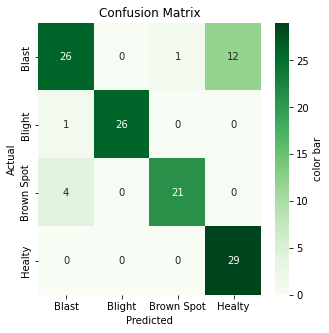

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.heatmap(data=cm3 ,annot=True, cmap="Greens",cbar_kws={"orientation":"vertical","label":"color bar"},xticklabels=['Blast','Blight','Brown Spot','Healty'],yticklabels=['Blast','Blight','Brown Spot','Healty'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

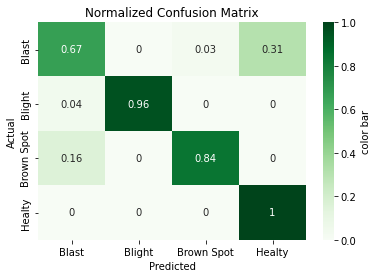

In [ ]:
# --- ---- normalized
import numpy as np
cm3_normalized=np.round(cm3/np.sum(cm3,axis=1).reshape(-1,1),2)
# --- ---- ---- heatmap
sns.heatmap(data=cm3_normalized ,annot=True, cmap="Greens",cbar_kws={"orientation":"vertical","label":"color bar"},xticklabels=['Blast','Blight','Brown Spot','Healty'],yticklabels=['Blast','Blight','Brown Spot','Healty'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Normalized Confusion Matrix")
plt.show()

In [ ]:
clf4  =   SVC(random_state=True)
clf4.fit(trainDataGlobal, trainLabelsGlobal)

SVC(random_state=True)

In [ ]:
y_predict4=clf4.predict(testDataGlobal)
y_predict4

array([3, 1, 3, 3, 3, 3, 3, 3, 3, 2, 1, 2, 0, 0, 3, 3, 1, 0, 3, 1, 0, 2,
       3, 0, 1, 2, 3, 3, 3, 3, 1, 3, 0, 1, 1, 1, 1, 2, 0, 1, 2, 3, 0, 0,
       3, 0, 2, 3, 0, 2, 0, 3, 2, 1, 3, 3, 3, 1, 3, 3, 1, 1, 0, 0, 3, 3,
       3, 3, 3, 0, 2, 1, 0, 2, 2, 2, 0, 1, 1, 3, 3, 0, 3, 3, 0, 0, 3, 2,
       3, 3, 2, 0, 0, 3, 0, 1, 3, 2, 1, 3, 0, 2, 3, 0, 3, 0, 3, 0, 1, 2,
       3, 3, 1, 2, 1, 1, 2, 1, 1, 2])

In [ ]:
cm4 = confusion_matrix(testLabelsGlobal,y_predict4)
confusion_matrix(testLabelsGlobal,y_predict4)#test label er jonne aita

array([[23,  0,  0, 16],
       [ 1, 26,  0,  0],
       [ 3,  0, 21,  1],
       [ 0,  0,  0, 29]])

In [ ]:
print(classification_report(testLabelsGlobal,y_predict4))

              precision    recall  f1-score   support

           0       0.85      0.59      0.70        39
           1       1.00      0.96      0.98        27
           2       1.00      0.84      0.91        25
           3       0.63      1.00      0.77        29

    accuracy                           0.82       120
   macro avg       0.87      0.85      0.84       120
weighted avg       0.86      0.82      0.82       120



In [ ]:
accuracy_score(testLabelsGlobal, y_predict4)

0.825

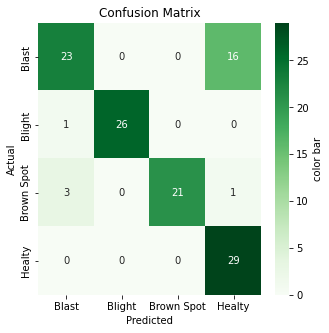

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.heatmap(data=cm4 ,annot=True, cmap="Greens",cbar_kws={"orientation":"vertical","label":"color bar"},xticklabels=['Blast','Blight','Brown Spot','Healty'],yticklabels=['Blast','Blight','Brown Spot','Healty'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

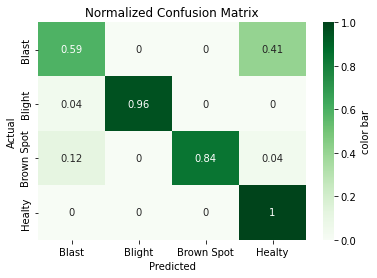

In [ ]:
# --- ---- normalized
import numpy as np
cm4_normalized=np.round(cm4/np.sum(cm4,axis=1).reshape(-1,1),2)
# --- ---- ---- heatmap
sns.heatmap(data=cm4_normalized ,annot=True, cmap="Greens",cbar_kws={"orientation":"vertical","label":"color bar"},xticklabels=['Blast','Blight','Brown Spot','Healty'],yticklabels=['Blast','Blight','Brown Spot','Healty'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Normalized Confusion Matrix")
plt.show()